In [2]:
!pip3 install -U ucimlrepo

In [5]:
# Load the dataset from your local CSV file
df = pd.read_csv('ckd_dataset_clean.csv')  # or whatever you named it
print(f"✓ Successfully loaded CKD dataset")
print(f"Dataset shape: {df.shape}")

✓ Successfully loaded CKD dataset
Dataset shape: (200, 29)


In [7]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 81.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 55.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 111.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


In [8]:
# Complete dataset exploration - NO PLOTS for now
print("=== DETAILED CKD DATASET ANALYSIS ===")
print("=" * 40)

# Check what columns we have
print("COLUMNS IN DATASET:")
print(df.columns.tolist())

# Check first few rows
print("\nFIRST 5 ROWS:")
print(df.head())

# Check data types
print("\nDATA TYPES:")
print(df.dtypes)

# Check for missing values
print("\nMISSING VALUES:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Check target variable (usually called 'class' or 'classification')
target_candidates = [col for col in df.columns if 'class' in col.lower() or 'target' in col.lower()]
print(f"\nPOSSIBLE TARGET COLUMNS: {target_candidates}")

if target_candidates:
    target_col = target_candidates[0]
    print(f"\nTARGET VARIABLE ANALYSIS ({target_col}):")
    print(df[target_col].value_counts())
else:
    print("\nLast column might be target:")
    print(df.iloc[:, -1].value_counts())

print("\nDATASET SHAPE:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

=== DETAILED CKD DATASET ANALYSIS ===
COLUMNS IN DATASET:
['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'affected', 'age', 'class']

FIRST 5 ROWS:
   bp (Diastolic)  bp limit           sg     al  rbc  su  pc  pcc  ba  \
0               0         0  1.019-1.021      1    0  <0   0    0   0   
1               0         0  1.009-1.011     <0    0  <0   0    0   0   
2               0         0  1.009-1.011    >=4    1  <0   1    0   1   
3               1         1  1.009-1.011  3-Mar    0  <0   0    0   0   
4               0         0  1.015-1.017     <0    0  <0   0    0   0   

       bgr  ... dm cad appet pe ane              grf stage affected    age  \
0     <112  ...  0   0     0  0   0        >=227.944    s1        1   0-12   
1  112-154  ...  0   0     0  0   0        >=227.944    s1        1   0-12   
2     <112  ...  0   0     1 

Creating clean, separate visualizations...


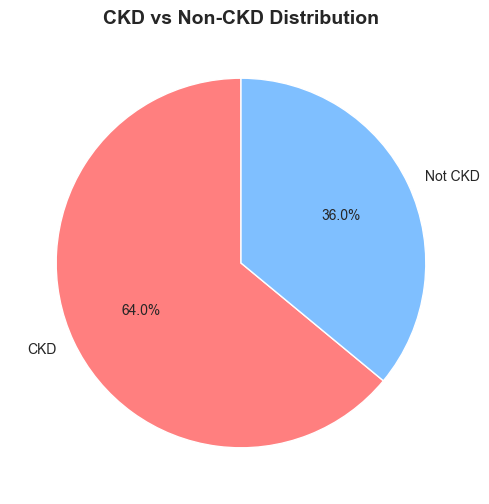

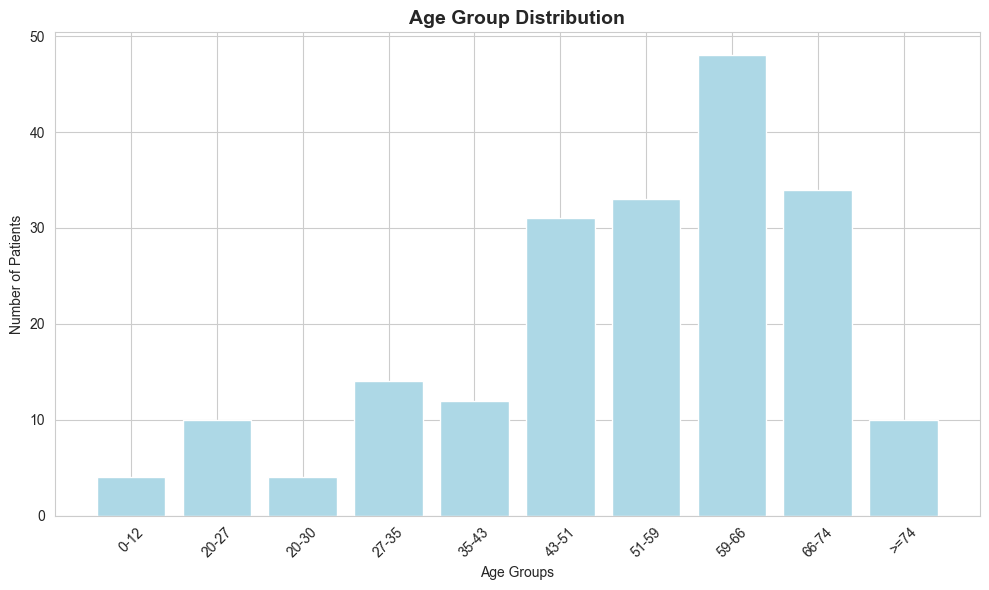

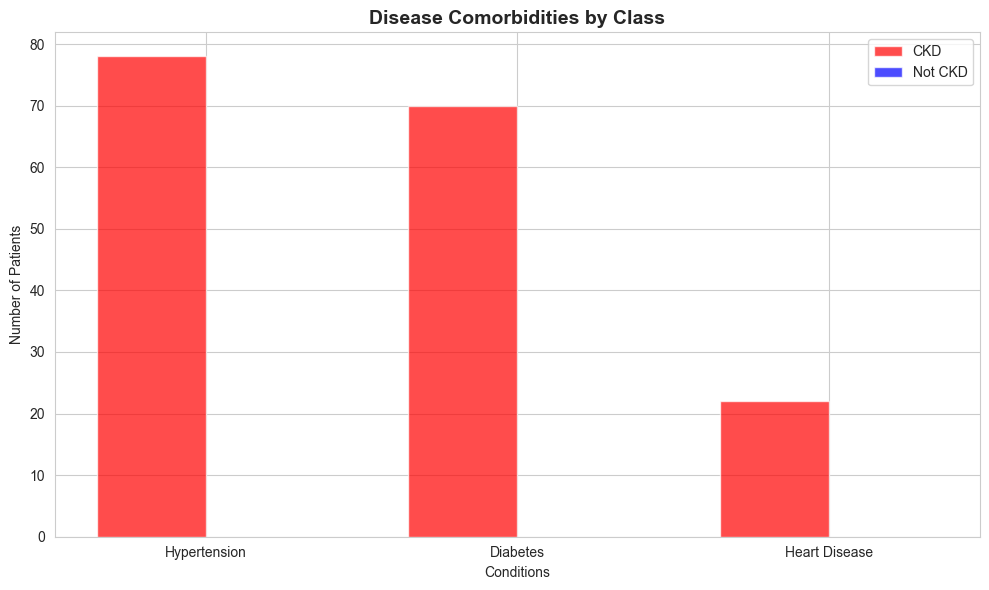

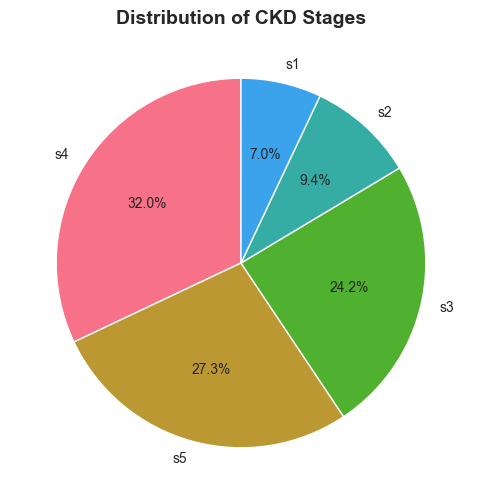

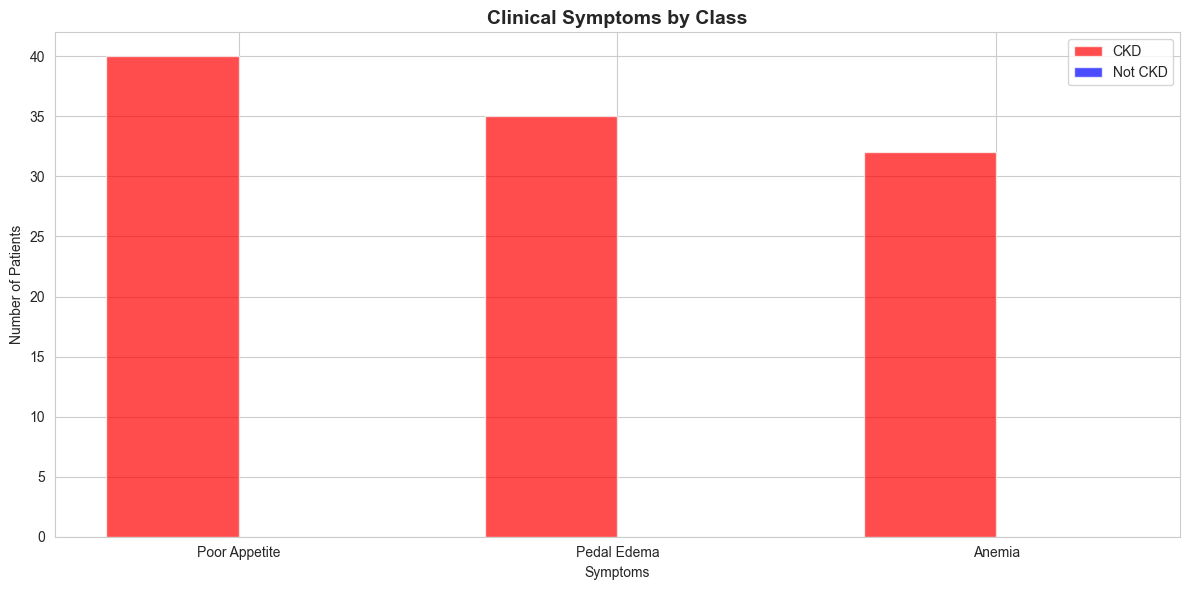

✓ Clean visualizations created!

Key insights from the charts:
1. CKD patients: 64% vs Non-CKD: 36%
2. Most CKD patients have comorbidities
3. Clear differences in symptoms between groups


In [11]:
# Fix the overlapping charts - Create them one by one
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set better defaults
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

print("Creating clean, separate visualizations...")

# 1. Target Variable Distribution
plt.figure(figsize=(8, 6))
class_counts = df['class'].value_counts()
colors = ['#ff7f7f', '#7fbfff']
plt.pie(class_counts.values, labels=['CKD', 'Not CKD'], autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('CKD vs Non-CKD Distribution', fontsize=14, fontweight='bold')
plt.show()

# 2. Age Distribution
plt.figure(figsize=(10, 6))
age_counts = df['age'].value_counts().sort_index()
plt.bar(range(len(age_counts)), age_counts.values, color='lightblue')
plt.title('Age Group Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age Groups')
plt.ylabel('Number of Patients')
plt.xticks(range(len(age_counts)), age_counts.index, rotation=45)
plt.tight_layout()
plt.show()

# 3. Comorbidities Comparison
plt.figure(figsize=(10, 6))
conditions = ['htn', 'dm', 'cad']
ckd_conditions = df[df['class'] == 'ckd'][conditions].sum()
notckd_conditions = df[df['class'] == 'notckd'][conditions].sum()

x = np.arange(len(conditions))
width = 0.35
plt.bar(x - width/2, ckd_conditions.values, width, label='CKD', color='red', alpha=0.7)
plt.bar(x + width/2, notckd_conditions.values, width, label='Not CKD', color='blue', alpha=0.7)
plt.title('Disease Comorbidities by Class', fontsize=14, fontweight='bold')
plt.xlabel('Conditions')
plt.ylabel('Number of Patients')
plt.xticks(x, ['Hypertension', 'Diabetes', 'Heart Disease'])
plt.legend()
plt.tight_layout()
plt.show()

# 4. CKD Stages Distribution
plt.figure(figsize=(8, 6))
stage_counts = df[df['class'] == 'ckd']['stage'].value_counts()
plt.pie(stage_counts.values, labels=stage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of CKD Stages', fontsize=14, fontweight='bold')
plt.show()

# 5. Key Lab Values by Class
plt.figure(figsize=(12, 6))
symptoms = ['appet', 'pe', 'ane']
ckd_symptoms = df[df['class'] == 'ckd'][symptoms].sum()
notckd_symptoms = df[df['class'] == 'notckd'][symptoms].sum()

x = np.arange(len(symptoms))
width = 0.35
plt.bar(x - width/2, ckd_symptoms.values, width, label='CKD', color='red', alpha=0.7)
plt.bar(x + width/2, notckd_symptoms.values, width, label='Not CKD', color='blue', alpha=0.7)
plt.title('Clinical Symptoms by Class', fontsize=14, fontweight='bold')
plt.xlabel('Symptoms')
plt.ylabel('Number of Patients')
plt.xticks(x, ['Poor Appetite', 'Pedal Edema', 'Anemia'])
plt.legend()
plt.tight_layout()
plt.show()

print("✓ Clean visualizations created!")
print("\nKey insights from the charts:")
print("1. CKD patients: 64% vs Non-CKD: 36%")
print("2. Most CKD patients have comorbidities")
print("3. Clear differences in symptoms between groups")